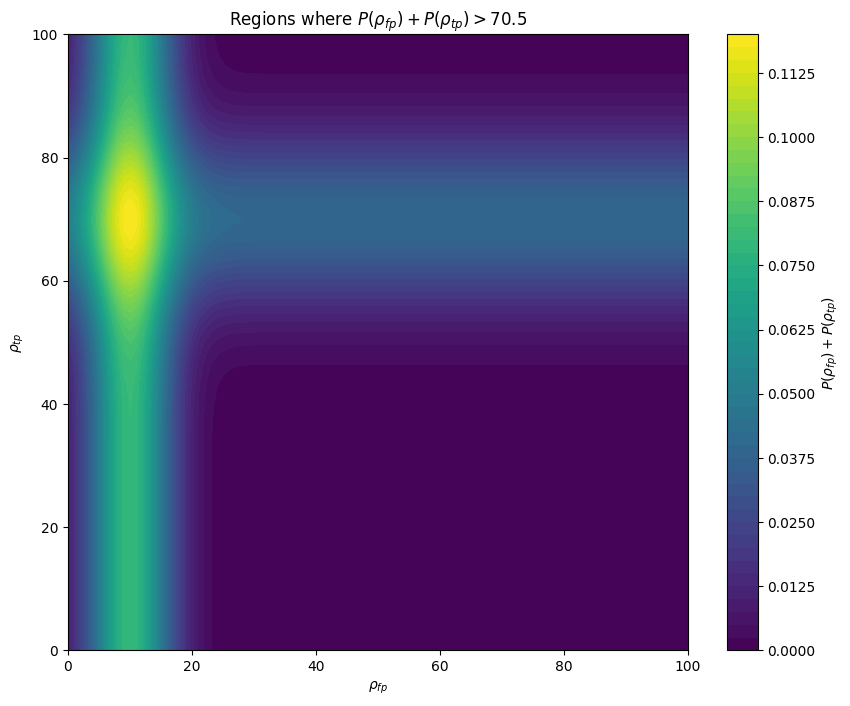

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parametri della distribuzione
mu_fp = 70  # Media di rate_fp
sigma_fp = 10  # Varianza (std) di rate_fp

mu_tp = 10  # Media di rate_tp
optimal_sigma_tp = 5  # Varianza (std) di rate_tp

# Soglia arbitraria th
th = 70.5

# Funzioni per calcolare le probabilità
def P_rate_fp(x):
    return stats.norm.pdf(x, mu_fp, sigma_fp)

def P_rate_tp(y):
    return stats.norm.pdf(y, mu_tp, optimal_sigma_tp)

# Definire un intervallo di valori per rate_fp e rate_tp
rate_fp_vals = np.linspace(0, 100, 100)  # Intervallo più ampio per rate_fp
rate_tp_vals = np.linspace(0, 100, 100)  # range per rate_tp rimane lo stesso

# Matrice per salvare le somme delle probabilità
P_sum = np.zeros((len(rate_fp_vals), len(rate_tp_vals)))

# Calcolo della somma delle probabilità
for i, x in enumerate(rate_fp_vals):
    for j, y in enumerate(rate_tp_vals):
        P_sum[i, j] = P_rate_fp(x) + P_rate_tp(y)

# Determinare gli intervalli in cui la somma supera la soglia
threshold_mask = P_sum > th

# Plot dei risultati
plt.figure(figsize=(10, 8))
plt.contourf(rate_fp_vals, rate_tp_vals, P_sum, levels=50, cmap="viridis")
plt.colorbar(label="$P(\\rho_{fp}) + P(\\rho_{tp})$")
plt.contour(rate_fp_vals, rate_tp_vals, threshold_mask, levels=[0.5], colors='red')
plt.xlabel("$\\rho_{{fp}}$")
plt.ylabel("$\\rho_{{tp}}$")
plt.title(f"Regions where $P(\\rho_{{fp}}) + P(\\rho_{{tp}}) > {th}$")
plt.show()


In [18]:
import numpy as np
import itertools
import pandas as pd
from scipy.stats import norm

# Definizione dei parametri da variare
mu_fp_values = [10, 100, 500]  # Diverse medie per rate_fp
mu_tp_props = [0.1, 0.5, 1.0, 1.5]  # Diverse medie per rate_tp
sigma_props = [0.3, 0.5, 0.8]  # Diverse deviazioni standard per rate_tp
th_values = [0.9, 1.0, 1.1]  # Diverse soglie

# Numero di simulazioni Monte Carlo
num_simulations = 100000

# Lista per salvare i risultati
results = []

# Loop su tutte le combinazioni di parametri
for mu_fp, sigma_fp_prop, mu_tp_prop, sigma_tp_prop, th_prop in itertools.product(mu_fp_values, sigma_props, mu_tp_props, sigma_props, th_values):

    mu_tp = (mu_fp * mu_tp_prop)
    sigma_fp = sigma_fp_prop * mu_fp
    optimal_sigma_tp = sigma_tp_prop * mu_tp
    th = (mu_fp * th_prop)
    
    # Simula valori per rate_fp e rate_tp dalle rispettive distribuzioni
    simulated_rate_fp = np.random.normal(mu_fp, sigma_fp, num_simulations)
    simulated_rate_tp = np.random.normal(mu_tp, optimal_sigma_tp, num_simulations)
    
    # Calcola la somma dei rate_fp e rate_tp
    sum_rates = simulated_rate_fp + simulated_rate_tp
    

    # Calcola la probabilità che la somma sia maggiore della soglia
    probability_tp = np.mean(sum_rates > th)
    probability_fp = np.mean(simulated_rate_fp > th)
    
    # Salva i risultati
    results.append({
        ('mu', 'fp'): mu_fp,
        ('mu', 'tp_prop'): mu_tp_prop,
        ('sigma', 'fp_prop'): sigma_fp_prop,
        ('sigma', 'tp_prop'): sigma_tp_prop,
        ('th', 'prop'): th_prop,
        ('ttp', 'mean'): np.mean((sum_rates > th) & (simulated_rate_fp < th)),
        ('fp', 'mean'): np.mean(simulated_rate_fp > th),
        ('tp', 'mean'): np.mean(sum_rates > th),
        ('fn', 'mean'): np.mean(sum_rates <= th),
        ('P()', 'FP'): 1 - norm.cdf(th, loc=mu_fp, scale=sigma_fp),
        ('P()', 'TP'): 1 - norm.cdf(th - (mu_fp - sigma_fp), loc=mu_tp, scale=optimal_sigma_tp),
        ('P()', 'FN'): norm.cdf(th, loc=mu_fp + mu_tp, scale=np.sqrt(sigma_fp**2 + optimal_sigma_tp**2))
    })

df = pd.DataFrame.from_records(results)

df.columns = pd.MultiIndex.from_tuples(df.columns)

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# variance respect to ('mu','fp') is tending to 0 -- start
# display(df[[('mu', 'fp'), ('fp', 'mean'), ('tp', 'mean'), ('fn', 'mean')]].groupby(('mu', 'fp')).describe().var())
# variance respect to ('mu','fp') is tending to 0 -- end

df = df.sort_values(by=('ttp', 'mean'), ascending=False)
df = df.set_index([
    ('mu', 'fp'),
    ('mu', 'tp_prop'),
    ('sigma', 'fp_prop'),
    ('sigma', 'tp_prop'),
    ('th', 'prop'),
])

df.round(2)

ttp  \
                                                                     mean   
(mu, fp) (mu, tp_prop) (sigma, fp_prop) (sigma, tp_prop) (th, prop)         
100      1.5           0.3              0.3              1.1         0.63   
10       1.5           0.3              0.3              1.1         0.62   
500      1.5           0.3              0.3              1.1         0.62   
100      1.0           0.3              0.3              1.1         0.62   
500      1.0           0.3              0.3              1.1         0.61   
10       1.0           0.3              0.3              1.1         0.61   
         1.5           0.3              0.5              1.1         0.60   
500      1.5           0.3              0.5              1.1         0.59   
100      1.5           0.3              0.5              1.1         0.59   
         1.0           0.3              0.5              1.1         0.58   
500      1.0           0.3              0.5              1.1         0.57   
10       1.0           0.3              0.5              1.1         0.57   
         1.5           0.5              0.3              1.1         0.56   
500      1.5           0.5              0.3              1.1         0.56   
100      1.5           0.5              0.3              1.1         0.56   
10       1.5           0.3              0.8              1.1         0.53   
100      1.5           0.3              0.8              1.1         0.53   
500      1.5           0.3              0.8              1.1         0.53   
                       0.5              0.5              1.1         0.52   
10       1.5           0.5              0.5              1.1         0.52   
100      1.0           0.5              0.3              1.1         0.52   
         1.5           0.5              0.5              1.1         0.52   
10       1.0           0.5              0.3              1.1         0.52   
500      1.0           0.5              0.3              1.1         0.52   
100      0.5           0.3              0.3              1.1         0.51   
500      0.5           0.3              0.3              1.1         0.51   
10       0.5           0.3              0.3              1.1         0.51   
500      1.0           0.3              0.8              1.1         0.51   
100      1.0           0.3              0.8              1.1         0.51   
10       1.0           0.3              0.8              1.1         0.51   
100      1.5           0.3              0.3              1.0         0.50   
500      1.5           0.3              0.3              1.0         0.50   
10       1.5           0.3              0.3              1.0         0.50   
500      1.0           0.3              0.3              1.0         0.49   
10       1.0           0.3              0.3              1.0         0.49   
         1.5           0.5              0.3              1.0         0.49   
100      1.0           0.3              0.3              1.0         0.49   
500      1.5           0.5              0.3              1.0         0.49   
100      1.5           0.8              0.3              1.1         0.49   
                       0.5              0.3              1.0         0.49   
10       1.5           0.8              0.3              1.1         0.48   
500      0.5           0.3              0.5              1.1         0.48   
         1.0           0.5              0.5              1.1         0.48   
10       1.0           0.5              0.5              1.1         0.48   
500      1.5           0.8              0.3              1.1         0.48   
10       0.5           0.3              0.5              1.1         0.48   
100      0.5           0.3              0.5              1.1         0.48   
         1.0           0.5              0.5              1.1         0.48   
         1.5           0.3              0.5              1.0         0.48   
10       1.5           0.3              0.5              1.0      

In [64]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

# Obiettivo: trovare i parametri ottimali per ottenere P(FP) = 0.35
def get_th(mu_fp, sigma_fp, FP_min):
    target_FP = FP_min

    # Funzione obiettivo per ottimizzare più parametri
    def objective(params, target_FP):
        th = params
        
        # Calcola P(FP)
        P_FP = 1 - norm.cdf(th, loc=mu_fp, scale=sigma_fp)
        
        # L'obiettivo è minimizzare la differenza assoluta tra P(FP) e il target desiderato
        return abs(P_FP - target_FP)

    # Inizializzazione con valori iniziali per i parametri
    initial_params = [80]  # mu_fp, sigma_fp, th

    # Minimizzazione per trovare i migliori valori di mu_fp, sigma_fp e th
    result = minimize(objective, x0=initial_params, args=(target_FP,), method='Nelder-Mead')

    # Output dei risultati
    optimal_th, = result.x
    optimal_FP = 1 - norm.cdf(optimal_th, loc=mu_fp, scale=sigma_fp)

    # print(f"Fixed mu_fp: {mu_fp:.4f}")
    # print(f"Fixed sigma_fp: {sigma_fp:.4f}")
    # print(f"Optimal th: {optimal_th:.4f}")
    # print(f"Resulting P(FP): {optimal_FP:.4f}\n")
    return optimal_th


# Obiettivo: trovare i parametri ottimali per ottenere P(FP) = 0.35
def get_optimal_mu_tp(mu_fp, sigma_fp, th, sigma_tp, target_TP):

    # Funzione obiettivo per ottimizzare più parametri
    def objective(params, target_TP):
        mu_tp = params
        
        # Calcola P(FP)
        P_TP = 1 - norm.cdf(th - (mu_fp - sigma_fp), loc=mu_tp, scale=sigma_tp)
        
        # L'obiettivo è minimizzare la differenza assoluta tra P(FP) e il target desiderato
        return abs(P_TP - target_TP)

    # Inizializzazione con valori iniziali per i parametri
    initial_params = [100]  # mu_tp, sigma_tp

    # Minimizzazione per trovare i migliori valori di mu_fp, sigma_fp e th
    result = minimize(objective, x0=initial_params, args=(target_TP,), method='Nelder-Mead')

    # Output dei risultati
    optimal_mu_tp, = result.x
    optimal_TP = 1 - norm.cdf(th - (mu_fp - sigma_fp), loc=optimal_mu_tp, scale=sigma_tp)

    # print(f"Fixed mu_fp: {mu_fp:.4f}")
    # print(f"Fixed sigma_fp: {sigma_fp:.4f}")
    # print(f"Optimal th: {th:.4f}")
    # print(f"Fixed sigma_tp: {sigma_tp:.4f}")
    # print(f"Optimal mu_tp: {optimal_mu_tp:.4f}")
    # print(f"Optimal mu_tp/mu_fp: {optimal_mu_tp/mu_fp:.4f}")
    # print(f"Resulting P(TP): {optimal_TP:.4f}\n\n")
    return optimal_mu_tp/mu_fp


mu_fps = np.linspace(5, 100, 5, endpoint=True)

rs = []
for mu_fp in mu_fps:
    sigma_fp_props = np.linspace(0.1, 0.8, 4)
    for sigma_fp_prop in sigma_fp_props:
        sigma_fp = mu_fp * sigma_fp_prop
        th = get_th(mu_fp, sigma_fp, 0.05)
        r = get_optimal_mu_tp(mu_fp, sigma_fp, th, 10, 0.8)
        rs.append([
            mu_fp,
            sigma_fp_prop,
            th/mu_fp,
            r
        ])
        pass

pd.DataFrame(rs, columns=['mu_fp', 'sigma_fp_prop', 'th/mu_fp', 'mu_tp/mu_fp']).round(2).sort_values(by=['mu_fp', 'sigma_fp_prop', 'th/mu_fp', 'mu_tp/mu_fp'], ascending=False)



,mu_fp,sigma_fp_prop,th/mu_fp,mu_tp/mu_fp
19,100.00,0.80,2.32,1.00
18,100.00,0.57,1.93,1.58
17,100.00,0.33,1.55,0.97
16,100.00,0.10,1.16,0.35
15,76.25,0.80,2.32,2.23
14,76.25,0.57,1.93,1.61
13,76.25,0.33,1.55,0.99
12,76.25,0.10,1.16,0.37
11,52.50,0.80,2.32,2.28
10,52.50,0.57,1.93,1.66


In [60]:

# df.index = pd.MultiIndex.from_tuples(df.index)
df.index
df.loc[pd.IndexSlice[10,:,0.8,0.8,:], :]

ttp  \
                                                                        mean   
(mu, fp) (mu, tp_prop) (sigma, fp_prop) (sigma, tp_prop) (th, prop)            
10       1.5           0.8              0.8              1.1         0.40585   
                                                         1.0         0.37307   
         1.0           0.8              0.8              1.1         0.35264   
         1.5           0.8              0.8              0.9         0.34278   
         1.0           0.8              0.8              1.0         0.32972   
                                                         0.9         0.30502   
         0.5           0.8              0.8              1.1         0.22972   
                                                         1.0         0.22053   
                                                         0.9         0.20972   
         0.1           0.8              0.8              1.0         0.05197   
                                                         1.1         0.05167   
                                                         0.9         0.05101   

                                                                          fp  \
                                                                        mean   
(mu, fp) (mu, tp_prop) (sigma, fp_prop) (sigma, tp_prop) (th, prop)            
10       1.5           0.8              0.8              1.1         0.45036   
                                                         1.0         0.50137   
         1.0           0.8              0.8              1.1         0.45183   
         1.5           0.8              0.8              0.9         0.54812   
         1.0           0.8              0.8              1.0         0.49931   
                                                         0.9         0.54812   
         0.5           0.8              0.8              1.1         0.45084   
                                                         1.0         0.50150   
                                                         0.9         0.54930   
         0.1           0.8              0.8              1.0         0.49955   
                                                         1.1         0.44951   
                                                         0.9         0.54815   

                                                                          tp  \
                                                                        mean   
(mu, fp) (mu, tp_prop) (sigma, fp_prop) (sigma, tp_prop) (th, prop)            
10       1.5           0.8              0.8              1.1         0.83298   
                                                         1.0         0.85062   
         1.0           0.8              0.8              1.1         0.78733   
         1.5           0.8              0.8              0.9         0.86477   
         1.0           0.8              0.8              1.0         0.81095   
                                                         0.9         0.83488   
         0.5           0.8              0.8              1.1         0.67142   
                                                         1.0         0.71222   
                                                         0.9         0.74940   
         0.1           0.8              0.8              1.0         0.54953   
                                                         1.1         0.49933   
                                                         0.9         0.59736   

                                                                          fn  
                                                                        mean  
(mu, fp) (mu, tp_prop) (sigma, fp_prop) (sigma, tp_prop) (th, prop)           
10       1.5           0.8              0.8              1.1         0.16702  
                                                         1.0         0.14938  
         1.0           0.8              0.8              1.1         0.2126

In [6]:
from SALib.sample.sobol import sample
from SALib.analyze import sobol
import numpy as np

def test_saltelli():
    # Definizione del problema
    problem = {
        'num_vars': 5,
        'names': ['mu_fp', 'sigma_fp', 'mu_tp', 'sigma_tp', 'th'],
        'bounds': [
            [10, 1000],
            [0.1, 1.5],
            [1, 100],
            [0.1, 1.5],
            [0.8, 1.2]
        ]
    }

    # Numero di campioni
    param_values = sample(problem, 10000)

    # Funzione obiettivo (calcola P(rate_fp + rate_tp > th))
    def model(X):
        results = []
        for i in range(X.shape[0]):
            mu_fp = X[i,0]
            sigma_fp = X[i,1] * mu_fp
            mu_tp = X[i,2] #* mu_fp
            sigma_tp = X[i,3] * mu_tp
            th = (mu_fp * X[i,4])

            # Simulazione di rate_fp e rate_tp
            simulated_rate_fp = np.random.normal(mu_fp, sigma_fp, 10000)
            simulated_rate_tp = np.random.normal(mu_tp, sigma_tp, 10000)
            
            # Calcolo della probabilità P(rate_fp + rate_tp > th)
            prob = np.mean((simulated_rate_fp + simulated_rate_tp) > th)
            results.append(prob)
            pass
        
        return np.array(results)

    # Calcola il modello per tutti i campioni
    Y = model(param_values)

    # Analisi di sensibilità di Sobol
    Si = sobol.analyze(problem, Y, print_to_console=True)
    pass

test_saltelli()
test_saltelli()

/Users/princio/Repo/princio/malware-detection-predict-file/venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
/Users/princio/Repo/princio/malware-detection-predict-file/venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                ST   ST_conf
mu_fp     0.268496  0.013499
sigma_fp  0.194386  0.010070
mu_tp     0.464945  0.019359
sigma_tp  0.218137  0.007963
th        0.085836  0.006788
                S1   S1_conf
mu_fp     0.163328  0.013790
sigma_fp  0.109953  0.013419
mu_tp     0.335469  0.020475
sigma_tp  0.153594  0.012900
th        0.046468  0.008337
                            S2   S2_conf
(mu_fp, sigma_fp)     0.017618  0.017419
(mu_fp, mu_tp)        0.032558  0.018336
(mu_fp, sigma_tp)     0.016404  0.020067
(mu_fp, th)           0.009473  0.017515
(sigma_fp, mu_tp)     0.016733  0.018443
(sigma_fp, sigma_tp)  0.010018  0.016410
(sigma_fp, th)        0.003063  0.015967
(mu_tp, sigma_tp)     0.031831  0.027294
(mu_tp, th)           0.021356  0.028941
(sigma_tp, th)       -0.004788  0.017433


/Users/princio/Repo/princio/malware-detection-predict-file/venv/lib/python3.12/site-packages/scipy/stats/_qmc.py:958: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)
/Users/princio/Repo/princio/malware-detection-predict-file/venv/lib/python3.12/site-packages/SALib/util/__init__.py:274: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  names = list(pd.unique(groups))


                ST   ST_conf
mu_fp     0.270334  0.013313
sigma_fp  0.193987  0.010345
mu_tp     0.464422  0.017993
sigma_tp  0.213919  0.009088
th        0.087258  0.006316
                S1   S1_conf
mu_fp     0.170606  0.013993
sigma_fp  0.108219  0.012402
mu_tp     0.343330  0.019704
sigma_tp  0.148711  0.015434
th        0.045820  0.007700
                            S2   S2_conf
(mu_fp, sigma_fp)     0.012194  0.018548
(mu_fp, mu_tp)        0.025807  0.020635
(mu_fp, sigma_tp)     0.013151  0.021211
(mu_fp, th)           0.002245  0.017758
(sigma_fp, mu_tp)     0.017093  0.017091
(sigma_fp, sigma_tp)  0.017577  0.018220
(sigma_fp, th)        0.005568  0.014649
(mu_tp, sigma_tp)     0.024552  0.028416
(mu_tp, th)           0.015998  0.029268
(sigma_tp, th)        0.000113  0.018960


In [16]:
from SALib.sample.sobol import sample
from SALib.analyze import sobol
import numpy as np
import itertools

def test_saltelli(mu_fp, mu_tp, how):
    # Definizione del problema
    problem = {
        'num_vars': 3,
        'names': ['sigma_fp', 'sigma_tp', 'th'],
        'bounds': [
            [0.1, 0.6],
            [0.1, 0.6],
            [0.8, 1.2]
        ]
    }

    # Numero di campioni
    param_values = sample(problem, 1000)

    # Funzione obiettivo (calcola P(rate_fp + rate_tp > th))
    def model(X):
        results = []
        for i in range(X.shape[0]):
            sigma_fp = X[i,0] * mu_fp
            sigma_tp = X[i,1] * mu_tp
            th = (mu_fp * X[i,2])

            # Simulazione di rate_fp e rate_tp
            simulated_rate_fp = np.random.normal(mu_fp, sigma_fp, 10000)
            simulated_rate_tp = np.random.normal(mu_tp, sigma_tp, 10000)
            
            # Calcolo della probabilità P(rate_fp + rate_tp > th)
            if how == 'ttp':
                prob = np.mean(((simulated_rate_fp + simulated_rate_tp) > th) & (simulated_rate_fp < th))
            elif how == 'tp':
                prob = np.mean((simulated_rate_fp + simulated_rate_tp) > th)
            elif how == 'fp':
                prob = np.mean((simulated_rate_fp) < th)
            results.append(prob)
            pass
        
        return np.array(results)

    # Calcola il modello per tutti i campioni
    Y = model(param_values)

    # Analisi di sensibilità di Sobol
    Si = sobol.analyze(problem, Y, print_to_console=True)
    pass

mu_fp = [100]
mu_tp = [0.5, 1, 1.5]
hows = ['ttp', 'tp', 'fp']

import warnings

ress= []
with warnings.catch_warnings():
    warnings.filterwarnings("ignore")

    for mu_fp, mu_tp, how in itertools.product(mu_fp, mu_tp, hows):
        print(f'mu_fp={mu_fp}')
        print(f'mu_tp={mu_tp}')
        print(f'  how={how}')
        ress.append(test_saltelli(mu_fp, mu_tp, how))
        print('\n')
        pass
    pass

mu_fp=100
mu_tp=0.5
  how=ttp
                ST   ST_conf
sigma_fp  0.936185  0.106679
sigma_tp  0.074228  0.008541
th        0.309422  0.064569
                S1   S1_conf
sigma_fp  0.705983  0.103394
sigma_tp  0.017867  0.022364
th        0.089857  0.042228
                            S2   S2_conf
(sigma_fp, sigma_tp) -0.025344  0.126756
(sigma_fp, th)        0.118870  0.130819
(sigma_tp, th)       -0.018518  0.033546


mu_fp=100
mu_tp=0.5
  how=tp
                ST   ST_conf
sigma_fp  0.171257  0.016659
sigma_tp  0.000793  0.000090
th        1.007644  0.099983
                S1   S1_conf
sigma_fp -0.003755  0.040615
sigma_tp  0.000730  0.002120
th        0.835798  0.076174
                            S2   S2_conf
(sigma_fp, sigma_tp)  0.001560  0.076239
(sigma_fp, th)        0.174002  0.070739
(sigma_tp, th)       -0.000491  0.002921


mu_fp=100
mu_tp=0.5
  how=fp
                ST   ST_conf
sigma_fp  0.173976  0.016639
sigma_tp  0.000828  0.000101
th        1.007999  0.106492
